# 피마 인디언 당뇨병 예측
먼저 이전에 사용한 `get_clf_eval()`함수에 AOC AUC 값을 측정하는 로직을 추가하면서, 함수의 인자를 늘려준다.

In [16]:
# 평가 지표 함수
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산한다
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)    #  오차행렬
    accuracy = accuracy_score(y_test, pred)       # 정확도
    precision = precision_score(y_test, pred)     # 정밀도
    recall = recall_score(y_test, pred)           # 재현율
    
    f1 = f1_score(y_test, pred)      # F1 스코어
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC 추가
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, f1_score:{f1:.4f}, AUC:{roc_auc:.4f}')

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('pima_diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data[:3]

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 데이터 살펴보기
`Pregnancies` : 임신횟수
`Glucose` : 포도당 부하 검사 수치
`BloodPressure` : 혈압
`SkinThickness` : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
`Insulin` : 혈청 인슐린(mu U/ml)
`BMI` : 체질량지수(체중(kg)/키(m))^2)
`DiabetesPedigreeFunction` : 당뇨 내력 가중치 값
`Age` : 나이
`Outcome` : 클래스 결정 값(0 or 1)

```
0    500
1    268
```
Negative 값(0)이 500개, Positive 값(1)이 268개로 0의 값이 상대적으로 많다.

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# feature data set : X
# label data set : Y
# 가장 마지막은 Outcome 칼럼으로 레이블 값이기 때문에 X, Y에 적절히 담기
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[: ,-1]

# train-test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156)

# 확인
X_train
print(len(X_train), len(X_test))

614 154


In [18]:
# 로지스틱 회귀로 학습/예측/평가 를 수행하겠다
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# output이 두개가 나오는데 뒤( =1값 =positive값)만 취하겠다.
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 10]
 [26 31]]
정확도:0.7662, 정밀도:0.7561, 재현율:0.5439, f1_score:0.6327, AUC:0.8343


책에서는 `lr_clf = LogisticRegression(solver = 'linear')`라고 되어있는데 `(solver = 'liblinear')` 의 모양으로 사용해주어야 제대로 나온다. 작은 데이터에 적합한 알고리즘 설정값이라 하며, L1 L2 제약조건을 모두 지원

In [29]:
# 0값 검사해보기
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 수
total_count = diabetes_data['Glucose'].count()

# feature별로 반복하면서 데이터 값이 0인 건수를 추출하고 퍼센트로 확인해본다.
for feature in zero_features :
    zero_cnt = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature}\n0 건수는 {zero_cnt:.4f}, 퍼센트는 {100*zero_cnt/total_count:.4f}')
    print()

Glucose
0 건수는 5.0000, 퍼센트는 0.6510

BloodPressure
0 건수는 35.0000, 퍼센트는 4.5573

SkinThickness
0 건수는 227.0000, 퍼센트는 29.5573

Insulin
0 건수는 374.0000, 퍼센트는 48.6979

BMI
0 건수는 11.0000, 퍼센트는 1.4323



In [30]:
# 0을 각 칼럼값의 평균으로 대체
zero_mean = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, zero_mean)

# 확인
diabetes_data[zero_features]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,79.799479,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,20.536458,79.799479,30.1


In [31]:
X = diabetes_data.iloc[: ,:8]
y = diabetes_data.iloc[: ,8]

# 표준화
# 일괄적으로 스케일링 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156)

# 로지스틱 회귀로 학습/예측/평가 를 수행
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# output이 두개가 나오는데 뒤( =1값 =positive값)만 취하겠다.
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[83 14]
 [25 32]]
정확도:0.7468, 정밀도:0.6957, 재현율:0.5614, f1_score:0.6214, AUC:0.8318


음... 이전 
`정확도:0.7662, 정밀도:0.7561, 재현율:0.5439, f1_score:0.6327, AUC:0.8343`
평균값으로 대체한 후
`정확도:0.7468, 정밀도:0.6957, 재현율:0.5614, f1_score:0.6214, AUC:0.8318`
로 결과가 나왔다. 이외에도 전체적으로 책과는 다르게 수치가 떨어진 모습을 확인할 수 있었다.

In [38]:
from sklearn.preprocessing import Binarizer

# 임계값을 0.48로 설정
binarizer = Binarizer(threshold = 0.48)

pred_proba = lr_clf.predict_proba(X_test)[:,1]
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba)

오차행렬
[[83 14]
 [25 32]]
정확도:0.7468, 정밀도:0.6957, 재현율:0.5614, f1_score:0.6214, AUC:0.8318


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# iris data
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성, 학습
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# 특성 중요도
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [4]:
!pip install graphviz


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", 
                class_names= iris_data.target_names, 
                feature_names = iris_data.feature_names, 
                impurity = True,
                filled= True)

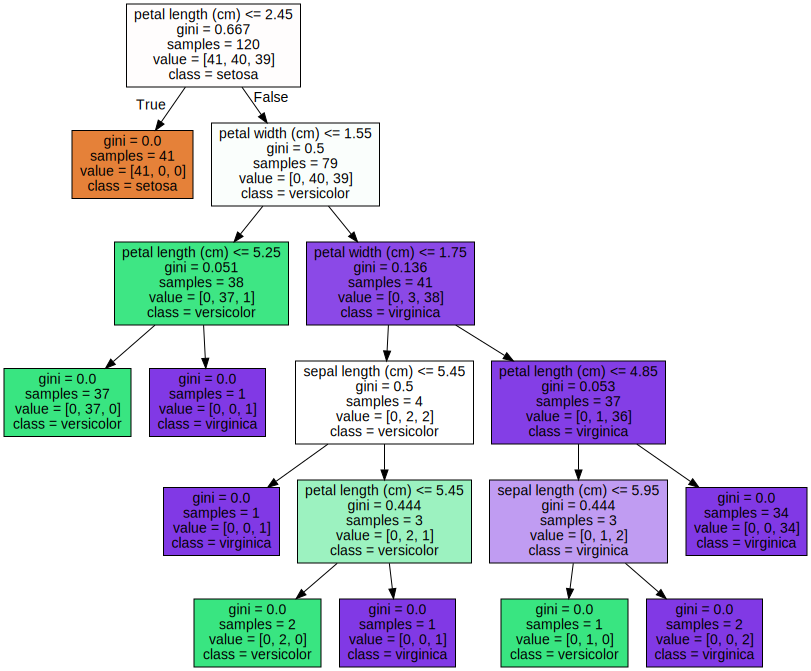

In [6]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_name_df[:3]

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [37]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [45]:
# column_name으로 그룹지어서 수를 센 후 column_index로 정렬시킨다
temp = feature_name_df.groupby("column_name").count().sort_values(by="column_index", ascending=False)

# 만약 컬럼 인덱스가 1 이상이라면 그 값을 반환해준다
feature_dup = temp[temp["column_index"] > 1]

print("중복된 피처 수:", feature_dup.count()[0])
feature_dup.head()

중복된 피처 수: 42


,column_index
column_name,
"fBodyAccJerk-bandsEnergy()-9,16",3
"fBodyAccJerk-bandsEnergy()-1,16",3
"fBodyGyro-bandsEnergy()-1,8",3
"fBodyGyro-bandsEnergy()-17,24",3
"fBodyGyro-bandsEnergy()-17,32",3


In [51]:
# 중복된 피처명 정리
def get_new_feature_name_df(old_feature_name_df):
    # column_name으로 그룹지어서 cumcount()로 피처별 중복 존재시 숫자를 부여
    # reset_index()로 column_index를 생성한다
    feature_dup = pd.DataFrame(old_feature_name_df.groupby("column_name").cumcount()).reset_index()

    # features.txt의 column_index는 1부터 시작이기 때문에
    feature_dup.columns = ["column_index", "dup_cnt"]
    feature_dup["column_index"] = feature_dup["column_index"] + 1
    
    
    # column_index를 기준으로 머지 후 중복컬럼명 변경
    new_feature_name_df = pd.merge(old_feature_name_df, feature_dup, how='outer')
    # 만약 x라는 컬럼명이 있다면 x_1, x_2와 같이 변경되도록 한다
    new_feature_name_df['column_name'] = new_feature_name_df.apply(\
                                                                   lambda x: x.column_name + "_" + str(x.dup_cnt)
                                                                   if x.dup_cnt > 0 
                                                                   else x.column_name, axis=1)
    return new_feature_name_df 

In [54]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset() 

In [56]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


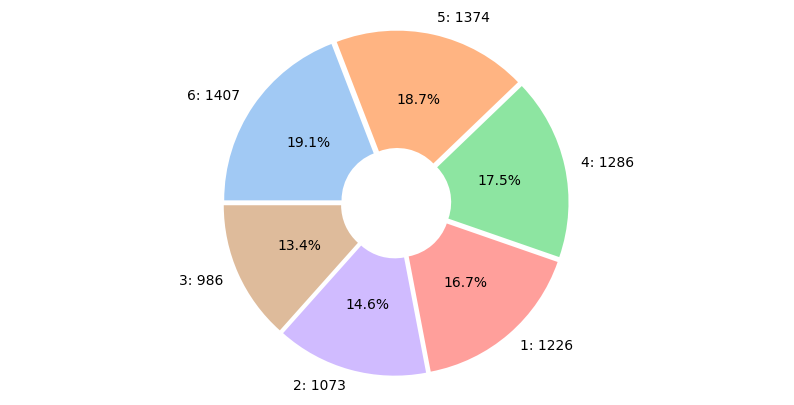

In [59]:

import seaborn as sns
plt.figure(figsize=(10,5))

frequency = y_train['action'].value_counts()

label = []
for key, value in frequency.to_dict().items():
    label.append(f"{key}: {value}")

plt.pie(frequency,
    startangle = 180,
    counterclock = False,
    explode = [0.03] * len(label),
    autopct = '%1.1f%%',
    labels = label,
    colors = sns.color_palette('pastel', len(label)),
    wedgeprops = dict(width=0.7)
  )


plt.axis('equal')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [24]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params()) 

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [27]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
    }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
CPU times: total: 3.16 s
Wall time: 33.7 s


In [61]:
%%time

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
    }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose = 3, n_jobs = 1)
grid_cv.fit(X_train, y_train)

print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .max_depth=6, min_samples_split=16;, score=0.814 total time=   1.7s
[CV 2/5] END .max_depth=6, min_samples_split=16;, score=0.868 total time=   1.8s
[CV 3/5] END .max_depth=6, min_samples_split=16;, score=0.820 total time=   1.8s
[CV 4/5] END .max_depth=6, min_samples_split=16;, score=0.867 total time=   1.8s
[CV 5/5] END .max_depth=6, min_samples_split=16;, score=0.870 total time=   1.8s
[CV 1/5] END .max_depth=8, min_samples_split=16;, score=0.806 total time=   2.3s
[CV 2/5] END .max_depth=8, min_samples_split=16;, score=0.830 total time=   2.1s
[CV 3/5] END .max_depth=8, min_samples_split=16;, score=0.861 total time=   2.1s
[CV 4/5] END .max_depth=8, min_samples_split=16;, score=0.875 total time=   2.2s
[CV 5/5] END .max_depth=8, min_samples_split=16;, score=0.903 total time=   2.2s
[CV 1/5] END max_depth=10, min_samples_split=16;, score=0.805 total time=   2.7s
[CV 2/5] END max_depth=10, min_samples_split=16;,

In [62]:
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


%%time = 해당 셀 실행시간 측정

음 cpu를 여러개 사용하는게 속도향상에 반드시 좋은 영향을 주는게 아닌가?

In [29]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

In [30]:
pred1 = grid_cv.predict(X_test)
accuracy_score(y_test, pred1)

0.8717339667458432

In [ ]:
best_df_clf = grid_cv.bes